# Getting started with gaze dataset 

In this example, we will show examples of the main functionalities included in the emtk.

This includes:
- Parsing raw data from the gaze dataset to pandas dataframe.
- Visualizing raw data, filtered fixation, saccades, and AOIs visualization.
- Applying fixation correction through setting offset.
- Generating AOIs for any gaze stimuli.
- Adding text tokens to generated AOIs.
- Adding srcML tags to AOIs and tokens.
- Performing hit test between fixations and AOIs. 

In [6]:
%load_ext autoreload
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing the tool

In [5]:
import pandas as pd
from g2c import parsers, visualization, util, aoi

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Parsing raw data from the UNL dataset

In [26]:
eye_events, samples = parsers.UNL_UM(sample_size = 50)

Processing files:   2%|▏         | 1/48 [00:02<01:43,  2.21s/file]

Processed file: UNL-UM_UO P103.tsv


Processing files:   4%|▍         | 2/48 [00:04<01:31,  1.99s/file]

Processed file: UNL-UM_UO P105.tsv


Processing files:   6%|▋         | 3/48 [00:07<01:49,  2.44s/file]

Processed file: UNL-UM_UO P107.tsv


Processing files:   8%|▊         | 4/48 [00:10<01:59,  2.72s/file]

Processed file: UNL-UM_UO P113.tsv


Processing files:  10%|█         | 5/48 [00:14<02:20,  3.27s/file]

Processed file: UNL-UM_UO P124.tsv


Processing files:  12%|█▎        | 6/48 [00:19<02:42,  3.87s/file]

Processed file: UNL-UM_UO P127.tsv


Processing files:  15%|█▍        | 7/48 [00:24<02:55,  4.28s/file]

Processed file: UNL-UM_UO P132.tsv


Processing files:  17%|█▋        | 8/48 [00:31<03:27,  5.20s/file]

Processed file: UNL-UM_UO P135.tsv


Processing files:  19%|█▉        | 9/48 [00:39<03:52,  5.96s/file]

Processed file: UNL-UM_UO P139.tsv


Processing files:  21%|██        | 10/48 [00:46<03:56,  6.23s/file]

Processed file: UNL-UM_UO P140.tsv


Processing files:  23%|██▎       | 11/48 [00:54<04:09,  6.74s/file]

Processed file: UNL-UM_UO P142.tsv


Processing files:  25%|██▌       | 12/48 [01:02<04:23,  7.31s/file]

Processed file: UNL-UM_UO P143.tsv


Processing files:  27%|██▋       | 13/48 [01:11<04:32,  7.79s/file]

Processed file: UNL-UM_UO P147.tsv


Processing files:  29%|██▉       | 14/48 [01:22<04:55,  8.69s/file]

Processed file: UNL-UM_UO P149.tsv


Processing files:  31%|███▏      | 15/48 [01:32<05:02,  9.17s/file]

Processed file: UNL-UM_UO P152.tsv


Processing files:  33%|███▎      | 16/48 [01:43<05:06,  9.57s/file]

Processed file: UNL-UM_UO P154.tsv


Processing files:  35%|███▌      | 17/48 [01:54<05:10, 10.02s/file]

Processed file: UNL-UM_UO P155.tsv


Processing files:  38%|███▊      | 18/48 [02:06<05:20, 10.69s/file]

Processed file: UNL-UM_UO P157.tsv


Processing files:  40%|███▉      | 19/48 [02:19<05:30, 11.40s/file]

Processed file: UNL-UM_UO P160.tsv


Processing files:  42%|████▏     | 20/48 [02:32<05:30, 11.80s/file]

Processed file: UNL-UM_UO P170.tsv


Processing files:  44%|████▍     | 21/48 [02:46<05:35, 12.43s/file]

Processed file: UNL-UM_UO P174.tsv


Processing files:  46%|████▌     | 22/48 [02:59<05:29, 12.68s/file]

Processed file: UNL-UM_UO P181.tsv


Processing files:  48%|████▊     | 23/48 [03:13<05:27, 13.09s/file]

Processed file: UNL-UM_UO P183.tsv


Processing files:  50%|█████     | 24/48 [03:28<05:31, 13.81s/file]

Processed file: UNL-UM_UO P192.tsv


Processing files:  52%|█████▏    | 25/48 [03:43<05:24, 14.10s/file]

Processed file: UNL-UM_UO P194.tsv


Processing files:  54%|█████▍    | 26/48 [04:00<05:25, 14.78s/file]

Processed file: UNL-UM_UO P195.tsv


Processing files:  56%|█████▋    | 27/48 [04:16<05:21, 15.33s/file]

Processed file: UNL-UM_UO P196.tsv


Processing files:  58%|█████▊    | 28/48 [04:32<05:10, 15.53s/file]

Processed file: UNL-UM_UO P198.tsv


Processing files:  60%|██████    | 29/48 [04:49<05:00, 15.83s/file]

Processed file: UNL-UM_UO P202.tsv


Processing files:  62%|██████▎   | 30/48 [05:06<04:53, 16.28s/file]

Processed file: UNL-UM_UO P220.tsv


Processing files:  65%|██████▍   | 31/48 [05:24<04:44, 16.73s/file]

Processed file: UNL-UM_UO P223.tsv


Processing files:  67%|██████▋   | 32/48 [05:42<04:33, 17.10s/file]

Processed file: UNL-UM_UO P224.tsv


Processing files:  69%|██████▉   | 33/48 [06:00<04:22, 17.49s/file]

Processed file: UNL-UM_UO P225.tsv


Processing files:  71%|███████   | 34/48 [06:20<04:15, 18.22s/file]

Processed file: UNL-UM_UO P231.tsv


Processing files:  73%|███████▎  | 35/48 [06:40<04:01, 18.58s/file]

Processed file: UNL-UM_UO P243.tsv


Processing files:  75%|███████▌  | 36/48 [07:00<03:50, 19.19s/file]

Processed file: UNL-UM_UO P246.tsv


Processing files:  77%|███████▋  | 37/48 [07:21<03:35, 19.63s/file]

Processed file: UNL-UM_UO P247.tsv


Processing files:  79%|███████▉  | 38/48 [07:43<03:24, 20.49s/file]

Processed file: UNL-UM_UO P248.tsv


Processing files:  81%|████████▏ | 39/48 [08:07<03:12, 21.37s/file]

Processed file: UNL-UM_UO P250.tsv


Processing files:  83%|████████▎ | 40/48 [08:30<02:55, 21.90s/file]

Processed file: UNL-UM_UO P252.tsv


Processing files:  85%|████████▌ | 41/48 [08:53<02:36, 22.30s/file]

Processed file: UNL-UM_UO P253.tsv


Processing files:  88%|████████▊ | 42/48 [09:18<02:17, 22.97s/file]

Processed file: UNL-UM_UO P254.tsv


Processing files:  90%|████████▉ | 43/48 [09:42<01:56, 23.32s/file]

Processed file: UNL-UM_UO P255.tsv


Processing files:  92%|█████████▏| 44/48 [10:07<01:35, 23.76s/file]

Processed file: UNL-UM_UO P256.tsv


Processing files:  94%|█████████▍| 45/48 [10:32<01:12, 24.28s/file]

Processed file: UNL-UM_UO P257.tsv


Processing files:  96%|█████████▌| 46/48 [10:58<00:49, 24.91s/file]

Processed file: UNL-UM_UO P260.tsv


Processing files:  98%|█████████▊| 47/48 [11:26<00:25, 25.68s/file]

Processed file: UNL-UM_UO P262.tsv


Processing files: 100%|██████████| 48/48 [11:54<00:00, 14.89s/file]

Processed file: UNL-UM_UO P266.tsv


In [27]:
samples.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,Recording timestamp,Project name,Export date,...,Presented Media name,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index
0,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237868,UNL-UM_UO,2025/3/7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,567.0,413.0
1,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237875,UNL-UM_UO,2025/3/7,...,ProLabQs Recording40.mp4,1920.0,1080.0,0.0,0.0,1920.0,1080.0,Saccade,42.0,655.0
2,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237882,UNL-UM_UO,2025/3/7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saccade,42.0,655.0
3,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237883,UNL-UM_UO,2025/3/7,...,ProLabQs Recording40.mp4,1920.0,1080.0,0.0,0.0,1920.0,1080.0,Saccade,42.0,655.0
4,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237891,UNL-UM_UO,2025/3/7,...,ProLabQs Recording40.mp4,1920.0,1080.0,0.0,0.0,1920.0,1080.0,Saccade,42.0,655.0


In [28]:
eye_events.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil_l,pupil_r,amplitude,peak_velocity,eye_event_type
0,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237868,567.0,718.0,346.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
1,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237916,192.0,543.0,342.0,NaN,NaN,None,3.494,3.425,NaN,NaN,fixation
2,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237925,192.0,543.0,342.0,NaN,NaN,None,3.491,3.422,NaN,NaN,fixation
3,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237933,192.0,543.0,342.0,NaN,NaN,None,3.489,3.419,NaN,NaN,fixation
4,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237941,192.0,543.0,342.0,NaN,NaN,None,3.485,3.421,NaN,NaN,fixation


In [29]:
unique_experiment_ids_samples = samples['experiment_id'].unique()
unique_experiment_ids_samples

array(['17623623_P103', '75894071_P105', '73142188_P107', '95297148_P113',
       '26355477_P124', '28464710_P127', '7792871_P132', '50508067_P135',
       '98138536_P139', '67006224_P140', '57466117_P142', '48914592_P143',
       '50725150_P147', '87467712_P149', '19942717_P152', '53504980_P154',
       '68288415_P155', '8953417_P157', '93748365_P160', '35630584_P170',
       '25899018_P174', '14117440_P181', '71261375_P183', '66742041_P192',
       '67744331_P194', '31424792_P195', '45622102_P196', '6103787_P198',
       '37714676_P202', '56897660_P220', '61922052_P223', '92561849_P224',
       '87020395_P225', '86625353_P231', '67020883_P243', '65560620_P246',
       '17281517_P247', '15631446_P248', '67306020_P250', '22713769_P252',
       '15120427_P253', '79664715_P254', '37314099_P255', '52450561_P256',
       '78499485_P257', '19050980_P260', '2128416_P262', '82886310_P266'],
      dtype=object)

In [30]:
unique_experiment_ids_eye_events = eye_events["experiment_id"].unique()
unique_experiment_ids_eye_events            

array(['17623623_P103', '75894071_P105', '73142188_P107', '95297148_P113',
       '26355477_P124', '28464710_P127', '7792871_P132', '50508067_P135',
       '98138536_P139', '67006224_P140', '57466117_P142', '48914592_P143',
       '50725150_P147', '87467712_P149', '19942717_P152', '53504980_P154',
       '68288415_P155', '8953417_P157', '93748365_P160', '35630584_P170',
       '25899018_P174', '14117440_P181', '71261375_P183', '66742041_P192',
       '67744331_P194', '31424792_P195', '45622102_P196', '6103787_P198',
       '37714676_P202', '56897660_P220', '61922052_P223', '92561849_P224',
       '87020395_P225', '86625353_P231', '67020883_P243', '65560620_P246',
       '17281517_P247', '15631446_P248', '67306020_P250', '22713769_P252',
       '15120427_P253', '79664715_P254', '37314099_P255', '52450561_P256',
       '78499485_P257', '19050980_P260', '2128416_P262', '82886310_P266'],
      dtype=object)

# AOI Detector

In [85]:
dir = "datasets/UNL_UM24_30July/stimuli/"
trial_id = 'Q5'

In [86]:
image_path = dir + trial_id + " (localhost).png"

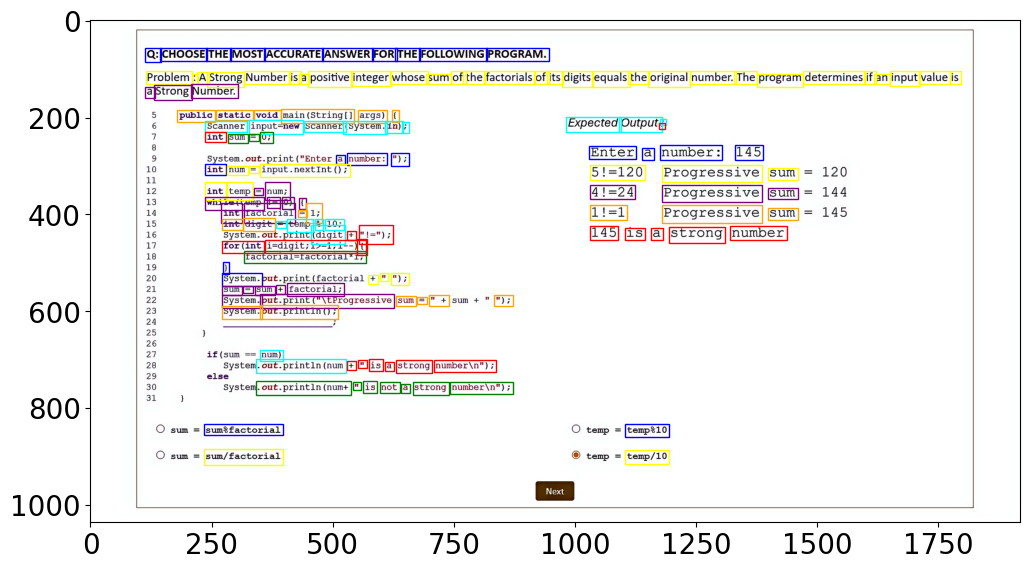

         kind            name trial_id     x    y  width  height  \
0    sub-line   line 2 part 1       Q5   118   62     23      19   
1    sub-line   line 2 part 2       Q5   148   62     88      16   
2    sub-line   line 2 part 3       Q5   244   62     41      16   
3    sub-line   line 2 part 4       Q5   293   62     63      16   
4    sub-line   line 2 part 5       Q5   363   62    113      16   
..        ...             ...      ...   ...  ...    ...     ...   
144  sub-line  line 22 part 7       Q5   748  750    119      16   
145  sub-line  line 23 part 1       Q5   239  838    153      13   
146  sub-line  line 23 part 2       Q5  1109  838     81      17   
147  sub-line  line 24 part 1       Q5   239  890    153      22   
148  sub-line  line 24 part 2       Q5  1109  892     81      18   

             token                                              image  
0               Q:  datasets/UNL_UM24_30July/stimuli/Q5 (localhost...  
1           CHOOSE  datasets/UNL_UM24_3

In [88]:
# Example Usage
# Run OCR detection with debugging enabled
aoi_result_df =aoi.aoi_detector(image_path, 
                                scale_factor=2, debug=True, 
                                use_preprocessing=False, min_confidence=5,
                                psm=1, oem=3)
# Display detected text results
print(aoi_result_df)

# Save aoi tokens structure

In [47]:
# file path
file_path = "output/unl_um-30July/aoi_tokens_structure/"

In [48]:
aoi.aoi_save_tokens_structure(aoi_result_df, file_path)

Saving AOI tokens structure: 100%|██████████| 149/149 [00:00<00:00, 74523.17it/s]

Completed! AOI tokens saved to ./output/unl_um-30July/aoi_tokens_structure//aoi_Q5_tokens_structrue.csv


# Maching aoi to trial_data

### for individual partcipant

In [214]:
experiment_id = '31424792_P195'
trial_id = 'Q1'
aoi_file_path = f"output/unl_um/aoi_tokens_structure/aoi_{trial_id}_tokens_structrue.csv"
aoi_file_path

'output/unl_um/aoi_tokens_structure/aoi_Q1_tokens_structrue.csv'

In [215]:
trial_data = eye_events[(eye_events['experiment_id'] == experiment_id) &
                        (eye_events['trial_id'] == trial_id)]

trial_data.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil_l,pupil_r,amplitude,peak_velocity,eye_event_type
64258,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q1,datasets/UNL_UM24/stimuli,Q1 (localhost).png,1238696288,258.0,955.0,505.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
64259,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q1,datasets/UNL_UM24/stimuli,Q1 (localhost).png,1238701653,258.0,955.0,505.0,NaN,NaN,None,2.968,3.022,NaN,NaN,fixation
64260,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q1,datasets/UNL_UM24/stimuli,Q1 (localhost).png,1238709987,258.0,955.0,505.0,NaN,NaN,None,2.967,3.034,NaN,NaN,fixation
64261,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q1,datasets/UNL_UM24/stimuli,Q1 (localhost).png,1238710363,258.0,955.0,505.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
64262,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q1,datasets/UNL_UM24/stimuli,Q1 (localhost).png,1238718320,258.0,955.0,505.0,NaN,NaN,None,2.971,3.019,NaN,NaN,fixation


In [ ]:
aoi_fixations = aoi.aoi_tokens_matcher(aoi_file_path, trial_data, trial_id, redius=25)

aoi_fixations.head()


Matching fixations to AOIs: 100%|██████████| 13094/13094 [02:55<00:00, 74.60fixation/s]


,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,...,pupil_right,aoi_kind,aoi_name,aoi_token,aoi_x,aoi_y,aoi_width,aoi_height,image,eye_event_type
0,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q1,datasets/UNL_UM24/stimuli,Q1 (localhost).png,1240101621,342.0,1161.0,...,2.967,sub-line,line 31 part 11,hello,1137,820,41,14,datasets/UNL_UM24/stimuli/Q1 (localhost).png,fixation
1,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q1,datasets/UNL_UM24/stimuli,Q1 (localhost).png,1240109954,342.0,1161.0,...,2.960,sub-line,line 31 part 11,hello,1137,820,41,14,datasets/UNL_UM24/stimuli/Q1 (localhost).png,fixation
2,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q1,datasets/UNL_UM24/stimuli,Q1 (localhost).png,1240118286,342.0,1161.0,...,2.972,sub-line,line 31 part 11,hello,1137,820,41,14,datasets/UNL_UM24/stimuli/Q1 (localhost).png,fixation
3,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q1,datasets/UNL_UM24/stimuli,Q1 (localhost).png,1240126618,342.0,1161.0,...,2.964,sub-line,line 31 part 11,hello,1137,820,41,14,datasets/UNL_UM24/stimuli/Q1 (localhost).png,fixation
4,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q1,datasets/UNL_UM24/stimuli,Q1 (localhost).png,1240134951,342.0,1161.0,...,2.966,sub-line,line 31 part 11,hello,1137,820,41,14,datasets/UNL_UM24/stimuli/Q1 (localhost).png,fixation


### save aoi_df

In [49]:
file_path = "output/unl_um-30July"

### for task

In [50]:
trial_id = 'Q5'
aoi_file_path = f"output/unl_um-30July/aoi_tokens_structure/aoi_{trial_id}_tokens_structure.csv"
aoi_file_path

'output/unl_um-30July/aoi_tokens_structure/aoi_Q5_tokens_structure.csv'

In [51]:
trial_data = eye_events[eye_events['trial_id'] == trial_id]

trial_data.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil_l,pupil_r,amplitude,peak_velocity,eye_event_type
0,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237868,567.0,718.0,346.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
1,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237916,192.0,543.0,342.0,NaN,NaN,None,3.494,3.425,NaN,NaN,fixation
2,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237925,192.0,543.0,342.0,NaN,NaN,None,3.491,3.422,NaN,NaN,fixation
3,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237933,192.0,543.0,342.0,NaN,NaN,None,3.489,3.419,NaN,NaN,fixation
4,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237941,192.0,543.0,342.0,NaN,NaN,None,3.485,3.421,NaN,NaN,fixation


In [52]:
trial_data = eye_events[eye_events['trial_id'] == trial_id]

trial_data.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil_l,pupil_r,amplitude,peak_velocity,eye_event_type
0,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237868,567.0,718.0,346.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
1,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237916,192.0,543.0,342.0,NaN,NaN,None,3.494,3.425,NaN,NaN,fixation
2,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237925,192.0,543.0,342.0,NaN,NaN,None,3.491,3.422,NaN,NaN,fixation
3,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237933,192.0,543.0,342.0,NaN,NaN,None,3.489,3.419,NaN,NaN,fixation
4,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,237941,192.0,543.0,342.0,NaN,NaN,None,3.485,3.421,NaN,NaN,fixation


In [53]:
aoi_fixations = aoi.aoi_tokens_matcher(aoi_file_path, trial_data, trial_id, redius=25)

aoi_fixations.head()


Matching fixations to AOIs: 100%|██████████| 794798/794798 [53:39<00:00, 246.89fixation/s]


,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,...,pupil_right,aoi_kind,aoi_name,aoi_token,aoi_x,aoi_y,aoi_width,aoi_height,image,eye_event_type
0,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,239183,183.0,193.0,...,3.632,sub-line,line 5 part 1,public,184,189,68,16,datasets/UNL_UM24_30July/stimuli/Q5 (localhost...,fixation
1,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,239191,183.0,193.0,...,3.645,sub-line,line 5 part 1,public,184,189,68,16,datasets/UNL_UM24_30July/stimuli/Q5 (localhost...,fixation
2,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,239200,183.0,193.0,...,3.634,sub-line,line 5 part 1,public,184,189,68,16,datasets/UNL_UM24_30July/stimuli/Q5 (localhost...,fixation
3,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,239208,183.0,193.0,...,3.634,sub-line,line 5 part 1,public,184,189,68,16,datasets/UNL_UM24_30July/stimuli/Q5 (localhost...,fixation
4,Tobii I-VT (Fixation),17623623_P103,17623623_P103,UNL-UM_UO P103.tsv,Q5,datasets/UNL_UM24_30July/stimuli,Q5 (localhost).png,239216,183.0,193.0,...,3.629,sub-line,line 5 part 1,public,184,189,68,16,datasets/UNL_UM24_30July/stimuli/Q5 (localhost...,fixation


In [44]:
file_path

'output/unl_um-30July'

In [45]:
# save aoi_fixations
aoi_fixations.to_csv(f"{file_path}/group/aoi/aoi_fixations_{trial_id}_nonopt.csv", index=False)